# PHM Data Challenge 2014

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## Data Loading

In [3]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

,Asset,Time,Reason,Part,Quantity
0,A311482,0,R417,P361646,1.0
1,A174613,0,R707,P991287,1.0
2,A174613,0,R707,P169319,1.0
3,A060723,0,R193,P184448,0.0
4,A174613,0,R707,P097048,1.0


In [4]:
usage = pd.read_csv("../data/Train - Usage.csv")
usage.head()

,Asset,Time,Use
0,A403193,5,31194.652034
1,A403193,17,31223.536355
2,A403193,56,31362.706261
3,A403193,124,31701.440562
4,A403193,144,31724.489666


In [5]:
failures = pd.read_csv("../data/Train - Failures.csv")
failures.head()

,Asset,Time
0,A403193,137
1,A403193,146
2,A403193,155
3,A403193,229
4,A403193,420


## Data Analysis

In [6]:
consumption.describe()

,Time,Quantity
count,270830.000000,270830.000000
mean,378.872691,3.565059
std,212.522371,20.420610
min,0.000000,-15.000000
25%,195.000000,1.000000
50%,388.000000,1.000000
75%,567.000000,2.000000
max,730.000000,3000.000000


In [7]:
usage.describe()

,Time,Use
count,22828.000000,22828.000000
mean,374.998730,30273.978469
std,211.670945,2528.890997
min,0.000000,25740.475447
25%,194.000000,28471.064870
50%,377.000000,30516.599911
75%,562.000000,31878.612314
max,730.000000,187239.128532


In [8]:
failures.describe()

,Time
count,9199.000000
mean,379.170345
std,210.243071
min,0.000000
25%,199.000000
50%,389.000000
75%,563.000000
max,730.000000


In [9]:
from collections import Counter

In [10]:
c = Counter(consumption.Reason)
reason_count = c.most_common()
reason_count

[('R707', 136714),
 ('R565', 58284),
 ('R193', 39668),
 ('R417', 12960),
 ('R446', 11090),
 ('R364', 7056),
 ('R119', 2143),
 ('R783', 1858),
 ('R044', 393),
 ('R606', 349),
 ('R575', 262),
 ('R064', 42),
 ('R396', 10),
 ('R782', 1)]

In [11]:
c = Counter(failures.Asset)
failures_count = c.most_common()
failures_count

[('A624962', 19),
 ('A344737', 19),
 ('A546754', 17),
 ('A396638', 17),
 ('A613089', 17),
 ('A196573', 17),
 ('A288494', 16),
 ('A122955', 16),
 ('A130356', 16),
 ('A968343', 16),
 ('A838297', 16),
 ('A073164', 16),
 ('A067512', 16),
 ('A824908', 15),
 ('A748065', 15),
 ('A354676', 15),
 ('A599433', 15),
 ('A689043', 15),
 ('A278781', 15),
 ('A943170', 14),
 ('A181324', 14),
 ('A175822', 14),
 ('A203444', 14),
 ('A402608', 14),
 ('A744243', 14),
 ('A317141', 14),
 ('A446813', 14),
 ('A592525', 14),
 ('A547881', 14),
 ('A550035', 14),
 ('A024432', 14),
 ('A621532', 14),
 ('A531932', 13),
 ('A399220', 13),
 ('A367237', 13),
 ('A333832', 13),
 ('A499073', 13),
 ('A926119', 13),
 ('A283388', 13),
 ('A250298', 13),
 ('A152340', 13),
 ('A733174', 13),
 ('A496983', 13),
 ('A616364', 13),
 ('A429540', 13),
 ('A519059', 13),
 ('A355669', 13),
 ('A558858', 12),
 ('A920271', 12),
 ('A439865', 12),
 ('A457170', 12),
 ('A010961', 12),
 ('A989821', 12),
 ('A423193', 12),
 ('A210011', 12),
 ('A481735

## Data Preprocessing

In [12]:
consumption.Time /= 730.0
usage.Time /= 730.0
failures.Time /= 730.0

In [13]:
consumption.Time.describe()

count    270830.000000
mean          0.519004
std           0.291127
min           0.000000
25%           0.267123
50%           0.531507
75%           0.776712
max           1.000000
Name: Time, dtype: float64

In [14]:
usage.Time.describe()

count    22828.000000
mean         0.513697
std          0.289960
min          0.000000
25%          0.265753
50%          0.516438
75%          0.769863
max          1.000000
Name: Time, dtype: float64

In [15]:
failures.Time.describe()

count    9199.000000
mean        0.519411
std         0.288004
min         0.000000
25%         0.272603
50%         0.532877
75%         0.771233
max         1.000000
Name: Time, dtype: float64

<IPython.core.display.Javascript object>


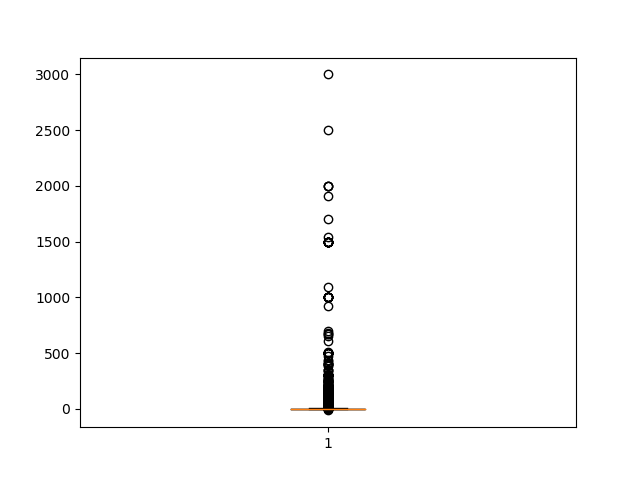

In [16]:
plt.boxplot(consumption.Quantity)
plt.show()

In [17]:
indexes = consumption.query("Quantity <= 0").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(inplace=True)

In [18]:
consumption.Quantity.describe()

count    266137.000000
mean          3.628079
std          20.594277
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        3000.000000
Name: Quantity, dtype: float64

## Training Data construction

In [19]:
train_df = consumption.copy()
train_df.drop("index", axis=1, inplace=True)

In [20]:
train_df.shape

(266137, 5)

In [21]:
train_df["Failure"] = [False] * train_df.shape[0]
train_df["Time_failure"] = [0] * train_df.shape[0]
train_df["Time_diff"] = [0] * train_df.shape[0]

In [22]:
train_df.head()

,Asset,Time,Reason,Part,Quantity,Failure,Time_failure,Time_diff
0,A311482,0.0,R417,P361646,1.0,False,0,0
1,A174613,0.0,R707,P991287,1.0,False,0,0
2,A174613,0.0,R707,P169319,1.0,False,0,0
3,A174613,0.0,R707,P097048,1.0,False,0,0
4,A174613,0.0,R707,P169319,1.0,False,0,0


In [23]:
failures_list = list(failures.itertuples(index=False, name=None))

In [24]:
for fail_asset, fail_time in tqdm(failures_list):
    possible_cons = train_df.query(
        "Time <= %f and Asset == '%s'" % (fail_time, fail_asset)
    ).tail(1)

    if len(possible_cons) > 0:
        train_df.loc[possible_cons.index, "Failure"] = True
        train_df.loc[possible_cons.index, "Time_failure"] = fail_time
        train_df.loc[possible_cons.index, "Time_diff"] = (
            fail_time - train_df.Time
        )

100%|██████████| 9199/9199 [03:07<00:00, 47.58it/s]


In [25]:
train_df.query('Failure==True')

,Asset,Time,Reason,Part,Quantity,Failure,Time_failure,Time_diff
54,A062344,0.000000,R193,P678273,10.0,True,0.084932,0.084932
58,A318624,0.000000,R707,P344321,2.0,True,0.098630,0.098630
93,A174613,0.000000,R707,P168211,1.0,True,0.124658,0.124658
95,A402608,0.000000,R364,P706115,1.0,True,0.078082,0.078082
104,A654091,0.000000,R193,P275049,4.0,True,0.021918,0.021918
167,A553451,0.000000,R783,P013029,1.0,True,0.080822,0.080822
291,A555548,0.001370,R565,P263308,4.0,True,0.006849,0.005479
292,A196573,0.001370,R446,P284537,1.0,True,0.012329,0.010959
296,A250298,0.001370,R193,P501319,1.0,True,0.047945,0.046575
359,A067561,0.001370,R783,P275049,1.0,True,0.038356,0.036986
